## TDMClient Functions

In [1]:
import tdmclient.notebook
#fonctions de Julie 
@tdmclient.notebook.sync_var 
def set_speed(right_speed,left_speed):
    global motor_right_target, motor_left_target
    motor_right_target=right_speed
    motor_left_target=left_speed

@tdmclient.notebook.sync_var
def stop_thymio():
    global motor_right_target,motor_left_target
    motor_right_target=0
    motor_left_target=0

@tdmclient.notebook.sync_var
def get_speed():
    global motor_right_speed, motor_left_speed
    return motor_right_speed,motor_left_speed

def speed_convesion(r_speed,l_speed):
    thymio_speed_to_mms = 0.4375 # value found in covariance_estimation

    #odometry 
    avg_thymio_speed = (r_speed + l_speed) / 2
    speed = avg_thymio_speed * thymio_speed_to_mms # [mm/s]
    return speed

def angular_vel_conversion(r_speed,l_speed):
    d = 95 # distance between the 2 wheels [mm]
    thymio_speed_to_mms = 0.388 # value found in covariance_estimation
    
    difference_speed = l_speed - r_speed
    omega = difference_speed * thymio_speed_to_mms / d # [rad/s]

    return omega

@tdmclient.notebook.sync_var
def get_proximity_values():
    global prox_horizontal
    prox = prox_horizontal
    prox_front = prox[2]
    prox_left = prox[0]
    prox_left_front = prox[1]
    prox_right_front = prox[3]
    prox_right = prox[4]
    return prox_front, prox_left, prox_left_front, prox_right_front, prox_right


## remove

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def speed_convesion(r_speed,l_speed):
    thymio_speed_to_mms = 0.430 # value found in covariance_estimation

    #odometry 
    avg_thymio_speed = (r_speed + l_speed) / 2
    speed = avg_thymio_speed * thymio_speed_to_mms # [mm/s]
    return speed

def angular_vel_conversion(r_speed,l_speed):
    d = 95 # distance between the 2 wheels [mm]
    thymio_speed_to_mms = 0.430 # value found in covariance_estimation
    
    difference_speed = l_speed - r_speed
    omega = difference_speed * thymio_speed_to_mms / d # [rad/s]

    return omega
print()

In [ ]:
state_est_prev=[0,0,0,0,0]
P_prev=np.diag([0.1,0.1,0.1,0.1,0.1])

obs_camera=[np.nan,np.nan,np.nan]

camera_state=False


# faire une boucle ici
actual_v=speed_convesion(get_speed())
actual_w=angular_vel_conversion(get_speed())
obs_odometry=np.concatenate((actual_v,actual_w))

input_v=speed_convesion(r_speed,l_speed)
input_w=angular_vel_conversion(r_speed,l_speed)
control_vect_prev=np.concatenate((input_v,input_w))


state_est, P_est = ekf(state_est_prev, control_vect_prev, P_prev, obs_camera, obs_odometry, camera_state)

state_est_prev=state_est
P_prev=P_est

## Robot Demo!
----

Imports from each module:

In [2]:
import Modules.Control as Control
import matplotlib.pyplot as plt
import Modules.Path_planning as Path_planning
import tdmclient.notebook
import Modules.ThymioCommands as ThymioCommands
import time
import numpy as np
import Modules.Kalman as Kalman
from Modules.ThymioVision import ThymioVision # Computer vision package

Begin the thymio, calibrate for demo

In [3]:
await tdmclient.notebook.start()
time.sleep(0.1)
global leds_circle
leds_circle=[32,32,0,0,0,0,0,32] # Turn on thymio lights for tracking

In [4]:
await tdmclient.notebook.stop()

Calibrate Camera, Detect Edges, Thymio Position, and Goal.

2024-12-04 16:12:27.635 Python[38237:1532771] _TIPropertyValueIsValid called with 16 on nil context!
2024-12-04 16:12:27.635 Python[38237:1532771] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2024-12-04 16:12:27.636 Python[38237:1532771] Text input context does not respond to _valueForTIProperty:


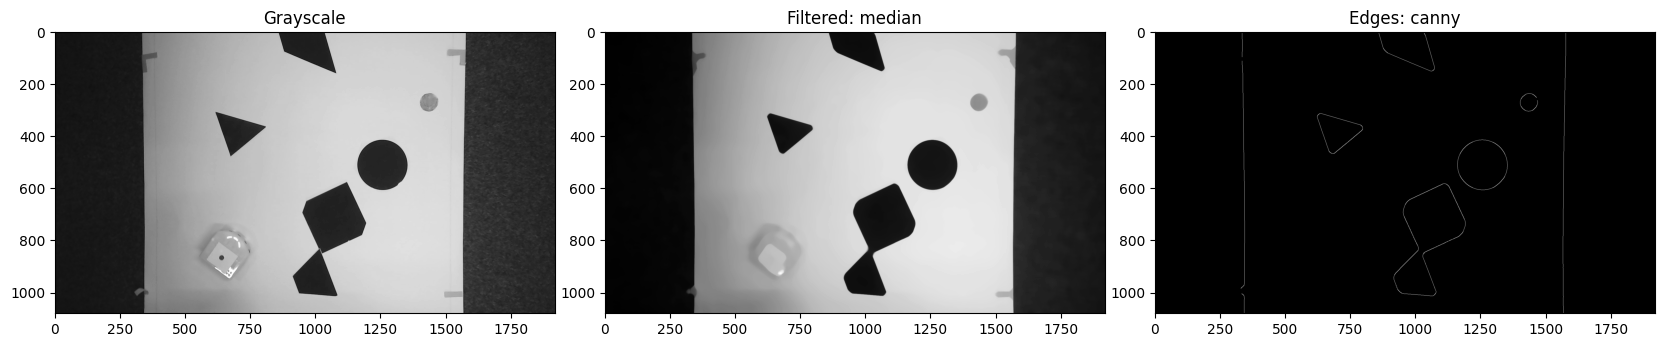

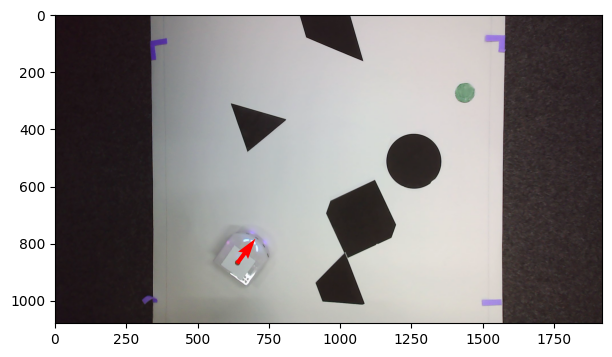

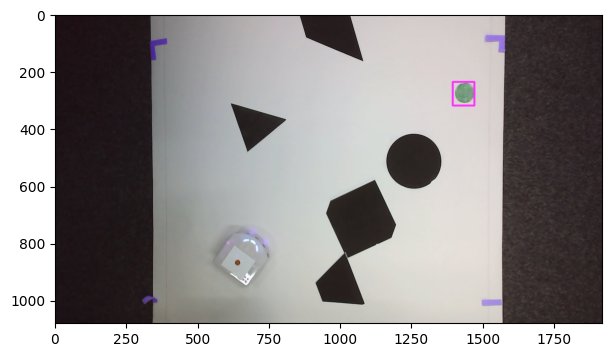

In [13]:
ThymioVision.calibrateCameraPos(0) #Calibrate the corners to the map.
frame = ThymioVision.captureImageOnCommand(0) # Capture the image to define the map
edges = ThymioVision.getEdges(frame, verbose=True)
start = ThymioVision.getThymioPose(frame, verbose=True)
end = ThymioVision.detectGoal(frame, verbose=True)

Display the map

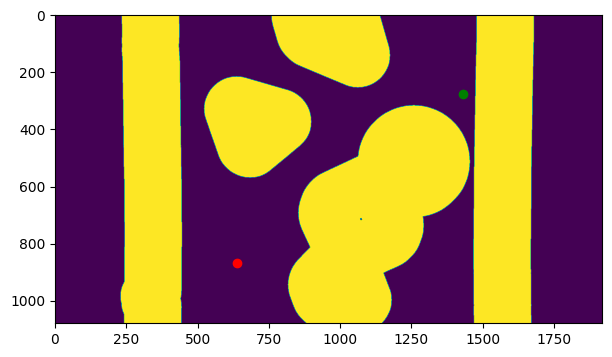

In [14]:
map = ThymioVision.getMap(frame, verbose=True)

In [15]:
# Define the inputs for the path_planning module
obstacles = map[0]
start = map[1]
end = map[2]
# adjusting x/y to row/col -> flip them.
correctedStart = [start[1], start[0]]
correctedGoal = [end[1], end[0]]

# Determine best path from map
path = Path_planning.A_star(obstacles, correctedStart, correctedGoal)

Path found: [[869, 639], [868, 640], [867, 641], [866, 642], [865, 643], [864, 644], [863, 645], [862, 646], [861, 647], [860, 648], [859, 649], [858, 650], [857, 651], [856, 652], [855, 653], [854, 654], [853, 655], [852, 656], [851, 657], [850, 658], [849, 659], [848, 660], [847, 661], [846, 662], [845, 663], [844, 664], [843, 665], [842, 666], [841, 667], [840, 668], [839, 669], [838, 670], [837, 671], [836, 672], [835, 673], [834, 674], [833, 675], [832, 676], [831, 677], [830, 678], [829, 679], [828, 680], [827, 681], [826, 682], [825, 683], [824, 684], [823, 685], [822, 686], [821, 687], [820, 688], [819, 689], [818, 690], [817, 691], [816, 692], [815, 693], [814, 694], [813, 695], [812, 696], [811, 697], [810, 698], [809, 699], [808, 700], [807, 701], [806, 702], [805, 703], [804, 704], [803, 705], [802, 706], [801, 707], [800, 708], [799, 709], [798, 710], [797, 711], [796, 712], [795, 713], [794, 713], [793, 714], [792, 715], [791, 716], [790, 717], [789, 718], [788, 719], [78

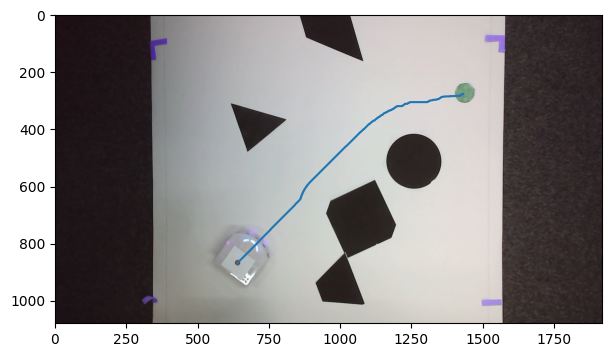

In [16]:
# Break the path into waypoints that the Thymio can follow.
# Swap back to pixel coordinates
swapped = Path_planning.swap_path_coordinates(path)
waypoints = []
for point in swapped:
    x, y = ThymioVision.pixelToRealSpace(point)
    waypoints.append((x*10, y*10)) #convert to mm!
waypoints = Control.segment_path(waypoints, step=40)

lx = []
ly = []
for wp in path:
    lx.append(wp[0])
    ly.append(wp[1])

# Display path on frame
plt.imshow(frame)
plt.plot(ly, lx)
plt.show()

Main Movement Loop!

In [20]:
import cv2
cv2.namedWindow("Camera view")
vc=cv2.VideoCapture(0)
print("vc captured")

# Initial state [x, y, theta]

###################### INITIALIZE STATE FROM MAP READ ######################

obstSpeedGain = [2, 1, -1, -1.5, -2.5]  # Gains for obstacle avoidance
OBSTACLE_THRESH_LOW_FRONT = 8 # Threshold to stop avoiding
OBSTACLE_THRESH_HIGH_FRONT = 15 # Threshold to start avoiding
thymio_state = 0  # 0 = Goal tracking, 1 = Obstacle avoidance

state_est=[0,0,0,0,0] 
ret,frame=vc.read()
if ret:
    pose = ThymioVision.getThymioPose(frame) #pixel location of thymio
    obs_camera = ThymioVision.pixelToRealSpace(pose[0:2]) #returns cm, *10 to get mm
    obs_camera = (obs_camera[0]*10, obs_camera[1]*10, pose[2]) #thymio position in mm to give to kalman filter
    state_est=[obs_camera[0],obs_camera[1],obs_camera[2],0,0]   
P_est=np.diag([0.1,0.1,0.1,0.1,0.1])
goal_tolerance = 30


###################### LOGGING DATA ######################
trajectory = []  # To store [x, y] positions
trajectory.append(obs_camera[0:2])
camera_trajectory = [] #trajectory mapped by camera
trajectory = []  # Logs (x, y) positions
metrics_rho = []  # Logs for distance to goal
metrics_alpha = []  # Logs for angle to goal
time_prev = time.time()

###################### BEGIN MOTION LOOP ######################
while len(waypoints) > 0: # while we have goals in life
    actual_time = time.time()
    Ts = actual_time - time_prev
    if Ts < 0.15:
        time.sleep(0.15-Ts)
    time_prev = actual_time

    waypoint = waypoints[0] # current goal

    ################### SENSOR READS ###################
    ret,frame=vc.read()
    if ret:
        pose = ThymioVision.getThymioPose(frame)#pixel location of thymio
        if pose[0] is not None:
            obs_camera = ThymioVision.pixelToRealSpace(pose[0:2]) #returns cm, *10 to get mm
            obs_camera = (obs_camera[0]*10, obs_camera[1]*10, pose[2]) #thymio position in mm to give to kalman filter
            camera_trajectory.append(obs_camera) #position in mm appended to log
            cv2.circle(frame, (pose[0:2]), 3, (0,255,255),-1) #camera pos
            # convert trajectory onto map
            if len(trajectory) > 0:
                lastPos = trajectory[-1]
                lastPos = (lastPos[0]/10, lastPos[1]/10)
                pixelPred = ThymioVision.realSpaceToPixel(lastPos)
                cv2.circle(frame, (pixelPred), 3, (0,255,0),-1) #est pos
            cv2.imshow("Camera view", frame)
        key = cv2.waitKey(50)
    if key == ord('q'):
        break
    if pose[0] is None:
        camera_state=False
    else:
        camera_state=True
    print(camera_state)

    prox_front, prox_left, prox_left_front, prox_right_front, prox_right = get_proximity_values()
    proximity_values = [prox_left, prox_left_front, prox_front, prox_right_front, prox_right]

    ###################### CHECK THYMIO STATE ######################

    # Check for obstacle state transitions
    if thymio_state == 0:
        # Switch to obstacle avoidance if an obstacle is detected
        if any((prox // 100) > OBSTACLE_THRESH_HIGH_FRONT for prox in proximity_values) :
            thymio_state = 1
        elif len(trajectory) >= 1 and ((obs_camera[0]-trajectory[-1][0])**2 + (obs_camera[1]-trajectory[-1][1])**2) > 500:
            print(obs_camera)
            print(trajectory[-1])
            # if change between states is too rapid, we have been kidnapped. recalculate and attempt again
            thymio_state = 2
    elif thymio_state == 1:
    # Switch back to goal tracking if obstacles are cleared
        if all((prox // 100) < OBSTACLE_THRESH_LOW_FRONT for prox in proximity_values):
            print("Obstacle avoided")
            #set_speed(20, 20)  #Continue getting away from obstacle for a short time ?   
            #stop_thymio() #idk if i keep it 
            thymio_state = 2 # set state to "kidnapped." Will recalculate the path and continue.

    ###################### GLOBAL NAVIGATION ######################
    if thymio_state == 0:
        print("Global Nav")
        input_left_speed, input_right_speed, reached , v_f , omega_f  = Control.move_to_waypoint(state_est, waypoint, goal_tolerance)
        # input_left_speed, input_right_speed, reached , v_f , omega_f  = Control.move_to_waypoint(obs_camera, waypoint, goal_tolerance)
        if not camera_state:
            set_speed(input_right_speed, input_left_speed)
        else:
            set_speed(input_right_speed, input_left_speed)
    ###################### LOCAL NAVIGATION ######################   
    elif thymio_state == 1:
        print("Avoidance")
        ## TODO MARIEM'S CODE
        pass
    ###################### KIDNAPPING RECALCULATION ###################### 
    else:
        print("Kidnapped") ##TODO FIX NO PATH FOUND ERROR
        # stop the thymio
        input_left_speed, input_right_speed, reached , v_f , omega_f = 0, 0, False, 0, 0
        set_speed(input_right_speed, input_left_speed)
        #if the camera is reading, update the path
        if camera_state:
            path = Path_planning.A_star(obstacles, (pose[1],pose[0]), correctedGoal)
            swapped = Path_planning.swap_path_coordinates(path)
            waypoints = []
            for point in swapped:
                x, y = ThymioVision.pixelToRealSpace(point)
                waypoints.append((x*10, y*10)) #convert to mm!
            waypoints = Control.segment_path(waypoints, step=40)
            trajectory.append(obs_camera[0:2]) #append most recent location
            thymio_state = 0 # go back to global nav

        
    ################### UPDATE STATE ESTIMATE ###################

    # Control input
    input_v = v_f #Ca jsp si je remplace par actual_v et actual_w
    input_w = omega_f
    control_vect_prev = [input_v, input_w]
    
    r_speed_odo, l_speed_odo = get_speed()
    actual_v = speed_convesion(r_speed_odo, l_speed_odo)
    actual_w = angular_vel_conversion(r_speed_odo, l_speed_odo)
    obs_odometry = [actual_v, actual_w]

    # Update state with Kalman filter
    state_est, P_est = Kalman.ekf(state_est, control_vect_prev, P_est, obs_camera, obs_odometry, camera_state,Ts)
    state_est[2]=Control.normalize_angle(state_est[2])
    # Log trajectory
    # trajectory.append((state_est[0], state_est[1]))
    trajectory.append((state_est[0], state_est[1]))
    
    # Calculate and log metrics
    rho = np.sqrt((waypoint[0] - state_est[0])**2 + (waypoint[1] - state_est[1])**2)
    alpha = Control.normalize_angle(np.arctan2(waypoint[1] - state_est[1], waypoint[0] - state_est[0]) - state_est[2])
    metrics_rho.append(rho)
    metrics_alpha.append(alpha)
    
    # Print updated state
    # print(ThymioVision.pixelToRealSpace(pose[0:2]))
    print(f"Position Actuelle camera  : x = {obs_camera[0]}, y = {obs_camera[1]}, theta = {obs_camera[2]}") 
    print(f"Position Actuelle odometry: x = {state_est[0]}, y = {state_est[1]}, theta = {state_est[2]}") 

    if reached:
        waypoints.pop(0)
        print(f"Reached waypoint: {waypoint}")
        # Stop the robot at the waypoint
        stop_thymio()

vc.release()
stop_thymio()
print("Trajectory completed!")


vc captured
True
Global Nav
Position Actuelle camera  : x = 50.25, y = 116.25, theta = 0.532322511232846
Position Actuelle odometry: x = 57.19680843463618, y = 117.0691489483035, theta = 0.5544030778140407
True
Global Nav
Position Actuelle camera  : x = 50.25, y = 116.25, theta = 0.5547922271378957
Position Actuelle odometry: x = 50.27920002062593, y = 116.24376038619943, theta = 0.578823385307456
True
Global Nav
Position Actuelle camera  : x = 54.75, y = 113.25, theta = 0.4947256824842485
Position Actuelle odometry: x = 54.680872782705244, y = 113.34489418365168, theta = 0.5031187656579079
True
(83.25, 177.75, np.float64(1.1571071135160333))
(np.float64(54.680872782705244), np.float64(113.34489418365168))
Kidnapped
Path found: [(327, 471), [326, 472], [325, 473], [324, 474], [323, 475], [322, 476], [322, 477], [322, 478], [321, 479], [320, 480], [319, 481], [318, 482], [317, 483], [316, 484], [315, 485], [314, 486], [313, 487], [312, 488], [311, 489], [310, 490], [309, 491], [308, 492

TypeError: 'NoneType' object is not iterable

In [31]:
stop_thymio()